In [78]:
# ALASKA AND HAWAII: https://medium.com/@alex_44314/use-python-geopandas-to-make-a-us-map-with-alaska-and-hawaii-39a9f5c222c6 

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import Request, urlopen
from shapely.geometry import Point
import numpy as np

%matplotlib inline
# activate plot theme
import qeds
# qeds.themes.mpl_style();
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 100

## Maps

### Court Shopping Among Inhouse Attorneys

In [65]:
# import the district datasets
df_inhouse = pd.read_csv("C://Users/schwa/OneDrive/Desktop/School/ECO225/Data/inhouse_attorneys.csv")

# drop rows without zip codes
print(len(df_inhouse.index))
df_inhouse.dropna(subset=["zip"], how="all", inplace=True)
df_inhouse["zip"] = df_inhouse["zip"]
print(len(df_inhouse.index))

# import court district shape file
district_df = gpd.read_file("C://Users/schwa/OneDrive/Desktop/School/ECO225/Data/U.S._District_Courts.zip")
zip_df = gpd.read_file("C://Users/schwa/OneDrive/Desktop/School/ECO225/Data/tl_2020_us_zcta510.zip")

1046
1041


In [66]:
zip_df["ZCTA5CE10"] = zip_df["ZCTA5CE10"].astype(float)
inhouse_zip = df_inhouse.merge(zip_df, how="left", left_on="zip", right_on="ZCTA5CE10")
inhouse_zip[inhouse_zip.isna().any(axis=1)]

# inhouse_zip[["zip","ZCTA5CE20"]].head(20)

name_attorney  party_row_count  case_row_id  \
0            A. William Urquhart            41124         8820   
1        ANTHONY BAIAMONTE , III           319447        56914   
8                Adam B. Strauss            61754        12494   
15                 Adorama, Inc.           377664        67305   
17              Adrian M. Pruetz            41124         8820   
...                          ...              ...          ...   
1034            William R. Clark           135026        25301   
1037            William R. Clark           340657        60940   
1038       William Y Klett , III           292327        52637   
1039  World Dental, Incorporated           193051        36253   
1040                 Yehia Awada           180550        34263   

                case_number party_type_x  attorney_row_count  \
0         1:00-cv-12234-EFH   plaintiff                96687   
1     3:12-cv-06053-MAS-TJB   defendant               892291   
8          1:05-cv-00373-JD   defendant               145909   
15    6:01-cv-06081-MAT-MWP   defendant              1063344   
17        1:00-cv-12234-EFH   plaintiff                96688   
...                     ...          ...                 ...   
1034          1:14-cv-13560    defendant              375276   
1037      4:02-cv-40067-NMG   plaintiff               949195   
1038      3:03-cv-02899-MBS   defendant               805606   
1039  2:06-cv-14340-GCS-VMM   defendant               512633   
1040  2:04-cv-00980-GMN-PAL   defendant               479779   

                                            contactinfo  \
0     Quinn Emanuel Urquhart Oliver & Hedges, LLP; 5...   
1     MEDICAL DIAGNOSTIC LABORATORIES, LLC; 2439 KUS...   
8     Dykema Gossett PLLC; 39577 Woodward Ave, Ste 3...   
15    Adorama, Inc.; 42 W. 18th Street; New York, NY...   
17    Quinn Emanuel Urquhart Oliver & Hedges, LLP; 1...   
...                                                 ...   
1034  EMC Corporation; 176 South Street; M/S 2-G/47;...   
1037  EMC Corporation; 35 Parkwood Drive; P.O. Box 9...   
1038  Nexsen Pruet Jacobs and Pollard; PO Drawer 242...   
1039  World Dental, Incorporated; 250 Kingston Drive...   
1040  Gaming Entertainment, Inc.; 4054 Dean Martin D...   

                                               position      zip  \
0     LEAD ATTORNEY; PRO HAC VICE; ATTORNEY TO BE NO...  10010.0   
1                 LEAD ATTORNEY; ATTORNEY TO BE NOTICED   8690.0   
8                 TERMINATED: 10/02/2007; LEAD ATTORNEY  48304.0   
15                                                  NaN  10011.0   
17                LEAD ATTORNEY; ATTORNEY TO BE NOTICED  90017.0   
...                                                 ...      ...   
1034  LEAD ATTORNEY; PRO HAC VICE; ATTORNEY TO BE NO...   1748.0   
1037  LEAD ATTORNEY; PRO HAC VICE; ATTORNEY TO BE NO...   1748.0   
1038  TERMINATED: 12/23/2003; LEAD ATTORNEY; ATTORNE...  29202.0   
1039                                                NaN  63125.0   
1040                                                NaN  89103.0   

                                             firm first_name gender  \
0     Quinn Emanuel Urquhart Oliver & Hedges, Llp         a.      M   
1                 Medical Diagnostic Laboratories    anthony      M   
8                             Dykema Gossett Pllc       adam      M   
15                                        Adorama   adorama,      F   
17    Quinn Emanuel Urquhart Oliver & Hedges, Llp     adrian      M   
...                                           ...        ...    ...   
1034                                          Emc    william      M   
1037                                          Emc    william      M   
1038              Nexsen Pruet Jacobs And Pollard    william      M   
1039                                 World Dental      world      M   
1040                         Gaming Entertainment      yehia      M   

      defendant  plaintiff  mediator  witness  other  defendant_M  \
0        

In [67]:
inhouse_zip[inhouse_zip["ZCTA5CE10"].isna()]
inhouse_zip.drop(columns=["CLASSFP10", "MTFCC10", "FUNCSTAT10",	"ALAND10",	"AWATER10",	"INTPTLAT10", "INTPTLON10"], inplace=True)

In [68]:
# merge zip codes not included in 2010 zip code file with 2022 zip code file
missing = inhouse_zip[inhouse_zip["ZCTA5CE10"].isna()].iloc[:, :]
missing.drop(columns=['ZCTA5CE10', 'geometry'], inplace=True)

zip_df = gpd.read_file("C://Users/schwa/OneDrive/Desktop/School/ECO225/Data/tl_2022_us_zcta520.zip")

zip_df["ZCTA5CE20"] = zip_df["ZCTA5CE20"].astype(float)
missing = missing.merge(zip_df, how="left", left_on="zip", right_on="ZCTA5CE20")
# missing[["zip"]][missing["ZCTA5CE20"].isna()].sort_values("zip")

# merge missing values back to the full dataset
missing.drop(columns=["GEOID10", 'GEOID20',
 'CLASSFP20',
 'MTFCC20',
 'FUNCSTAT20',
 'ALAND20',
 'AWATER20',
 'INTPTLAT20',
 'INTPTLON20'], inplace=True)
missing = missing.rename(columns={"ZCTA5CE20": "ZCTA5CE10"})

inhouse_zip = inhouse_zip[inhouse_zip["ZCTA5CE10"].isna() == False]
inhouse_zip = pd.concat([inhouse_zip, missing], axis=0)

In [69]:
# convert the inhouse_zip dataframe to a geodataframe
inhouse_zip = gpd.GeoDataFrame(inhouse_zip, geometry="geometry")

# use to_crs to ensure that the units for the polygons are the same
district_df.to_crs(crs=4326, inplace=True)
inhouse_zip.to_crs(crs=4326, inplace=True)

# merge the dataframes
inhouse_zip = gpd.sjoin(inhouse_zip, district_df, how="left", predicate="intersects")

In [84]:
# extract court region based on zip
for region in ["Eastern", "Southern", "Western", "Northern"]:
    inhouse_zip.loc[inhouse_zip.NAME.str.contains(region, na=False), "zip_region"] = region

# alter formatting of str to match
inhouse_zip["zip_region"] = inhouse_zip["zip_region"].str.strip()
inhouse_zip["STATE_NAME"] = inhouse_zip["STATE_NAME"].str.strip()
inhouse_zip["zip_region"] = inhouse_zip["zip_region"].fillna("None")
inhouse_zip["court_region"] = inhouse_zip["court_region"].fillna("None")

# check if district where the attorney is located is the same as the district where they filed
inhouse_zip["correct_region"] = np.where(inhouse_zip['zip_region'] == inhouse_zip['court_region'], 1, 0)
inhouse_zip["correct_state"] = np.where(inhouse_zip['STATE_NAME'] == inhouse_zip['court_state'], 1, 0)
inhouse_zip["court_shopping"] = np.where(inhouse_zip['correct_region'] + inhouse_zip['correct_state'] == 2, 0, 1)

# inhouse_zip[["zip_region", "court_region", "STATE_NAME", "court_state", "correct_region", "correct_state", "court_shopping"]].head(100)

zip_region court_region            STATE_NAME     court_state  \
0    Southern         None              New York   Massachusetts   
1        None         None            New Jersey      New Jersey   
2     Western      Western            Washington      Washington   
3     Western      Western            Washington      Washington   
4     Western      Western            Washington      Washington   
5     Western      Western            Washington      Washington   
6     Western      Western            Washington      Washington   
7    Northern      Western           Mississippi       Tennessee   
7     Western      Western             Tennessee       Tennessee   
8     Eastern         None              Michigan   New Hampshire   
9     Western      Western              Michigan        Michigan   
10    Eastern      Western              New York      California   
11    Eastern      Western              New York      California   
12   Southern      Western            California       Wisconsin   
13   Southern     Southern            California      California   
14    Eastern     Northern          Pennsylvania        Illinois   
15   Southern      Western              New York        New York   
16   Northern     Southern            California      California   
17       None         None            California   Massachusetts   
18       None         None            California   Massachusetts   
19   Northern     Northern            California      California   
20       None     Northern         Massachusetts        Illinois   
21    Western     Northern              Missouri         Georgia   
23   Southern     Southern               Florida         Florida   
24   Northern      Eastern            California           Texas   
25   Northern      Western            California        New York   
26   Northern      Eastern               Georgia       Tennessee   
27   Northern         None              Illinois   New Hampshire   
28   Northern     Northern               Georgia        Illinois   
29       None      Western                Kansas        Michigan   
30   Southern      Eastern                 Texas           Texas   
31    Eastern      Eastern              Virginia        Virginia   
32   Southern      Western            California       Wisconsin   
33    Eastern      Eastern                 Texas           Texas   
34    Eastern      Eastern                 Texas           Texas   
35    Eastern      Eastern                 Texas           Texas   
36    Eastern      Eastern                 Texas           Texas   
37    Eastern      Eastern                 Texas           Texas   
38    Eastern      Eastern                 Texas           Texas   
39    Eastern      Eastern                 Texas           Texas   
40    Eastern      Eastern                 Texas           Texas   
41    Eastern      Eastern                 Texas           Texas   
42    Eastern      Eastern                 Texas           Texas   
43    Eastern      Eastern                 Texas           Texas   
44    Eastern      Eastern                 Texas           Texas   
45    Eastern      Eastern                 Texas           Texas   
46    Eastern      Eastern                 Texas           Texas   
47    Eastern      Eastern                 Texas           Texas   
48    Eastern      Eastern                 Texas           Texas   
49    Eastern      Eastern                 Texas           Texas   
50       None     Northern             Tennessee        Illinois   
51   Northern     Northern            California           Texas   
52   Northern     Northern            California      California   
53    Western         None            Washington     Connecticut   
54    Western      Eastern            Washington           Texas   
55       None         None                Kansas        Colorado   
57       None      Western        North Carolina  North Carolina   
57    Western      Western        North Carolina  North Car

In [24]:
# START HERE: create net inflow variable
inhouse_zip

# aggregate across district

name_attorney  party_row_count  case_row_id  \
0              A. William Urquhart            41124         8820   
1          ANTHONY BAIAMONTE , III           319447        56914   
2                       Aaron Keyt           168140        32050   
3                       Aaron Keyt           172368        32824   
4                       Aaron Keyt           174413        33223   
..                             ...              ...          ...   
121               William D Miller             6029         1381   
122  William Joseph Cornelius , Jr           240526        42245   
123  William Joseph Cornelius , Jr           249248        43803   
124  William Joseph Cornelius , Jr           253428        44682   
125              William R VanHole            42975         9106   

               case_number party_type_x  attorney_row_count  \
0        1:00-cv-12234-EFH   plaintiff                96687   
1    3:12-cv-06053-MAS-TJB   defendant               892291   
2        2:01-cv-00985-MJP   plaintiff               451267   
3        2:02-cv-02085-MJP   plaintiff               461784   
4        2:03-cv-00103-MJP   plaintiff               466698   
..                     ...          ...                 ...   
121          0:10-cv-03849    plaintiff               17281   
122      2:13-cv-00213-JRG    mediator               674425   
123  2:14-cv-00081-JRG-RSP    mediator               701951   
124  2:14-cv-00915-JRG-RSP    mediator               713248   
125      1:01-cv-00637-LMB   defendant               100634   

                                           contactinfo  \
0    Quinn Emanuel Urquhart Oliver & Hedges, LLP; 5...   
1    MEDICAL DIAGNOSTIC LABORATORIES, LLC; 2439 KUS...   
2    DIGITAL CONTROL INC; 425 SW 41ST ST; RENTON, W...   
3    DIGITAL CONTROL INC; 425 SW 41ST ST; RENTON, W...   
4    DIGITAL CONTROL INC; 425 SW 41ST ST; RENTON, W...   
..                                                 ...   
121  3M Innovative Properties Company; PO Box 33427...   
122  Wilson Robertson & Cornelius PC; 909 ESE Loop ...   
123  Wilson Robertson & Cornelius PC; 909 ESE Loop ...   
124  Wilson Robertson & Cornelius PC; 909 ESE Loop ...   
125  BOISE CASCADE CORPORATION; Legal Dept; PO Box ...   

                                              position      zip  \
0    LEAD ATTORNEY; PRO HAC VICE; ATTORNEY TO BE NO...  10010.0   
1                LEAD ATTORNEY; ATTORNEY TO BE NOTICED   8690.0   
2                LEAD ATTORNEY; ATTORNEY TO BE NOTICED  98055.0   
3                LEAD ATTORNEY; ATTORNEY TO BE NOTICED  98055.0   
4                LEAD ATTORNEY; ATTORNEY TO BE NOTICED  98055.0   
..                                                 ...      ...   
121     TERMINATED: 09/13/2012; ATTORNEY TO BE NOTICED  55144.0   
122                             ATTORNEY TO BE NOTICED  75711.0   
123                             ATTORNEY TO BE NOTICED  75711.0   
124                             ATTORNEY TO BE NOTICED  75711.0   
125              LEAD ATTORNEY; ATTORNEY TO BE NOTICED  83728.0   

                                            firm first_name gender  defendant  \
0    Quinn Emanuel Urquhart Oliver & Hedges, Llp         a.      M        0.0   
1                Medical Diagnostic Laboratories    anthony      M        1.0   
2                            Digital Control Inc      aaron      M        0.0   
3                            Digital Control Inc      aaron      M        0.0   
4                            Digital Control Inc      aaron      M        0.0   
..                                           ...        ...    ...        ...   
121                     3M Innovative Properties    william      M        0.0   
122              Wilson Robertson & Cornelius Pc    william      M        0.0   
123              Wilson Robertson & Cornelius Pc    william      M        0.0   
124              Wilson Robertson & Cornelius Pc    william      M        0.0   
125                                Boise Cascade    wi

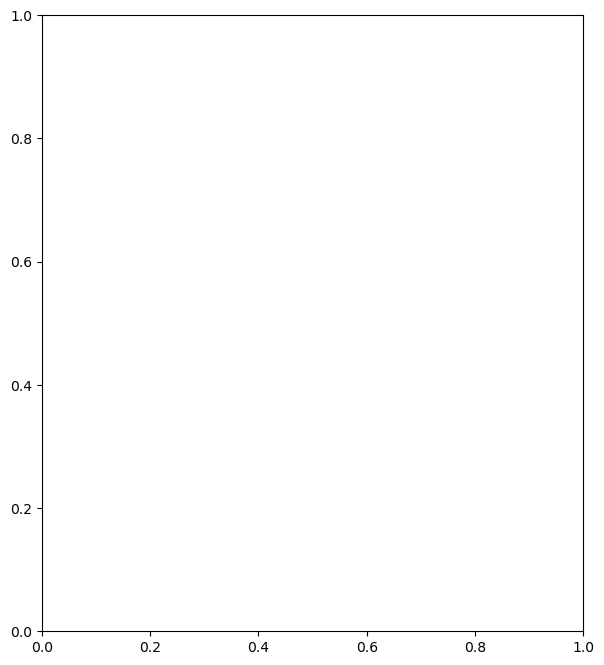

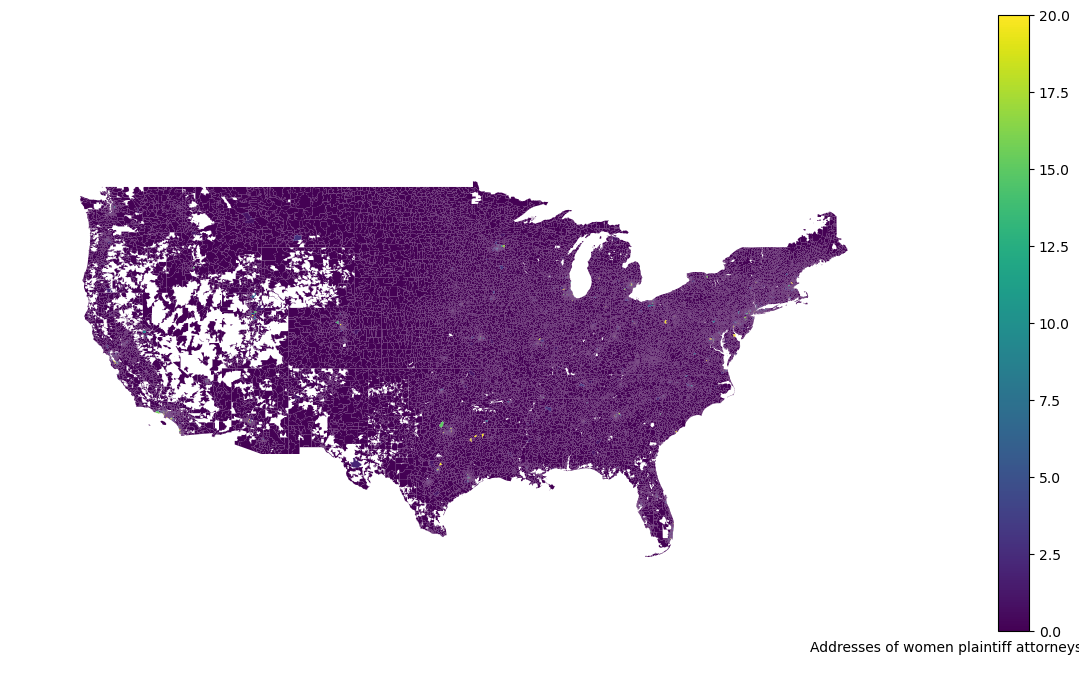

In [105]:
fig, gax = plt.subplots(figsize=(15,8))

# district_df.plot(ax=gax, edgecolor="black", color="white")
zip_df_merge.plot(
    ax=gax, edgecolor="none", column='plaintiff_F', legend=True, vmin=0, vmax=20 #range of your column value for the color legend
)

# Add text to let people know what we are plotting
gax.annotate('Addresses of women plaintiff attorneys listed',xy=(0.54, 0.05),  xycoords='figure fraction')

gax.set_xlim(-130, -60)
gax.set_ylim(20, 60)

plt.axis('off')

plt.show()

In [ ]:
# collapse by zip code
list(df_inhouse.columns)
df_attorneys_zip = df_attorneys.groupby("zip").agg({'defendant': "sum", 'plaintiff': "sum",
     'mediator': "sum",
     'witness': "sum",
     'other': "sum",
     'defendant_M': "sum",
     'defendant_F': "sum",
     'plaintiff_M': "sum",
     'plaintiff_F': "sum",
     'mediator_M': "sum",
     'mediator_F': "sum",
     'witness_M': "sum",
     'witness_F': "sum",
     'other_M': "sum",
     'other_F': "sum",
     'male': "sum",
     'female': "sum",
     'total': "sum"})

df_attorneys_zip.head(10)
# df_attorneys[df_attorneys["zip"] < 10000]
# df_attorneys.dtypes